In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


# EDA

In [2]:
df_games = pd.read_csv('./games.csv', parse_dates=['release_date'])
df_items = pd.read_csv('./items.csv')
df_reviews = pd.read_csv('./reviews_sentiment_analysis.csv')
df_genres = pd.read_csv('./games_genres.csv')
df_specs = pd.read_csv('./games_specs.csv')
# df_games = pd.read_csv('./games.csv', parse_dates=['release_date'])

In [15]:
df_games.head()

,app_name,release_date,price,id
0,Lost Summoner Kitty,2018-01-04,4.99,761140
1,Ironbound,2018-01-04,0.00,643980
2,Real Pool 3D - Poolians,2017-07-24,0.00,670290
3,弹炸人2222,2017-12-07,0.99,767400
4,Battle Royale Trainer,2018-01-04,3.99,772540


In [16]:
df_items.head()

,user_id,item_id,playtime_forever
0,76561197970982479,10.0,6.0
1,76561197970982479,30.0,7.0
2,76561197970982479,300.0,4733.0
3,76561197970982479,240.0,1853.0
4,76561197970982479,3830.0,333.0


In [17]:
df_reviews.head()

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,2011.0,1250,True,2
1,76561197970982479,2011.0,22200,True,2
2,76561197970982479,2011.0,43110,True,2
3,js41637,2014.0,251610,True,2
4,js41637,2013.0,227300,True,2


In [18]:
df_genres.head()

,id,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Free to Play,Early Access,Sports,Massively Multiplayer,Racing,Utilities
0,761140,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,643980,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,670290,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,767400,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,772540,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_specs.head()

,id,Single-player,Steam Achievements,Downloadable Content,Steam Trading Cards,Steam Cloud,Multi-player,Full controller support,Partial Controller Support,Steam Leaderboards,Co-op,Shared/Split Screen,Cross-Platform Multiplayer,Stats,Online Multi-Player
0,761140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,643980,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,670290,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,767400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,772540,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# juntamos todo el dataset.


In [40]:
merged_data = df_games.merge(df_items, left_on='id', right_on='item_id', how='inner')\
                     .merge(df_reviews, left_on='id', right_on='item_id', how='inner')\
                     


In [3]:
df_merged_gen_specs=df_genres.merge(df_specs, on='id', how='inner')

# Análisis Descriptivo
cpmienzo con un análisis descriptivo para entender los datos. 

In [21]:
# Descripción de df_games
print(df_games.describe())

              price            id
count  28824.000000  3.008500e+04
mean       8.857281  4.440048e+05
std       16.149897  1.842230e+05
min        0.000000  1.000000e+01
25%        2.990000  3.218300e+05
50%        4.990000  4.383000e+05
75%        9.990000  5.889700e+05
max      995.000000  2.028850e+06


In [22]:
# Descripción de df_items
print(df_items.describe())

            item_id  playtime_forever
count  3.285246e+06      3.285246e+06
mean   1.772373e+05      1.555251e+03
std    1.266741e+05      6.721032e+03
min    1.000000e+01      1.000000e+00
25%    3.912000e+04      4.400000e+01
50%    2.149500e+05      2.050000e+02
75%    2.630600e+05      8.080000e+02
max    5.286600e+05      6.427730e+05


In [23]:
# Descripción de df_reviews
print(df_reviews.describe())

             posted        item_id  sentiment_analysis
count  49162.000000   49162.000000        49162.000000
mean    2014.150157  155546.856068            1.482059
std        0.841857  124539.512286            0.749642
min     2010.000000      10.000000            0.000000
25%     2014.000000    6910.000000            1.000000
50%     2014.000000  209100.000000            2.000000
75%     2015.000000  248405.000000            2.000000
max     2015.000000  428880.000000            2.000000


# Correlación
calcular la correlación entre variables numéricas para identificar relaciones lineales entre ellas.

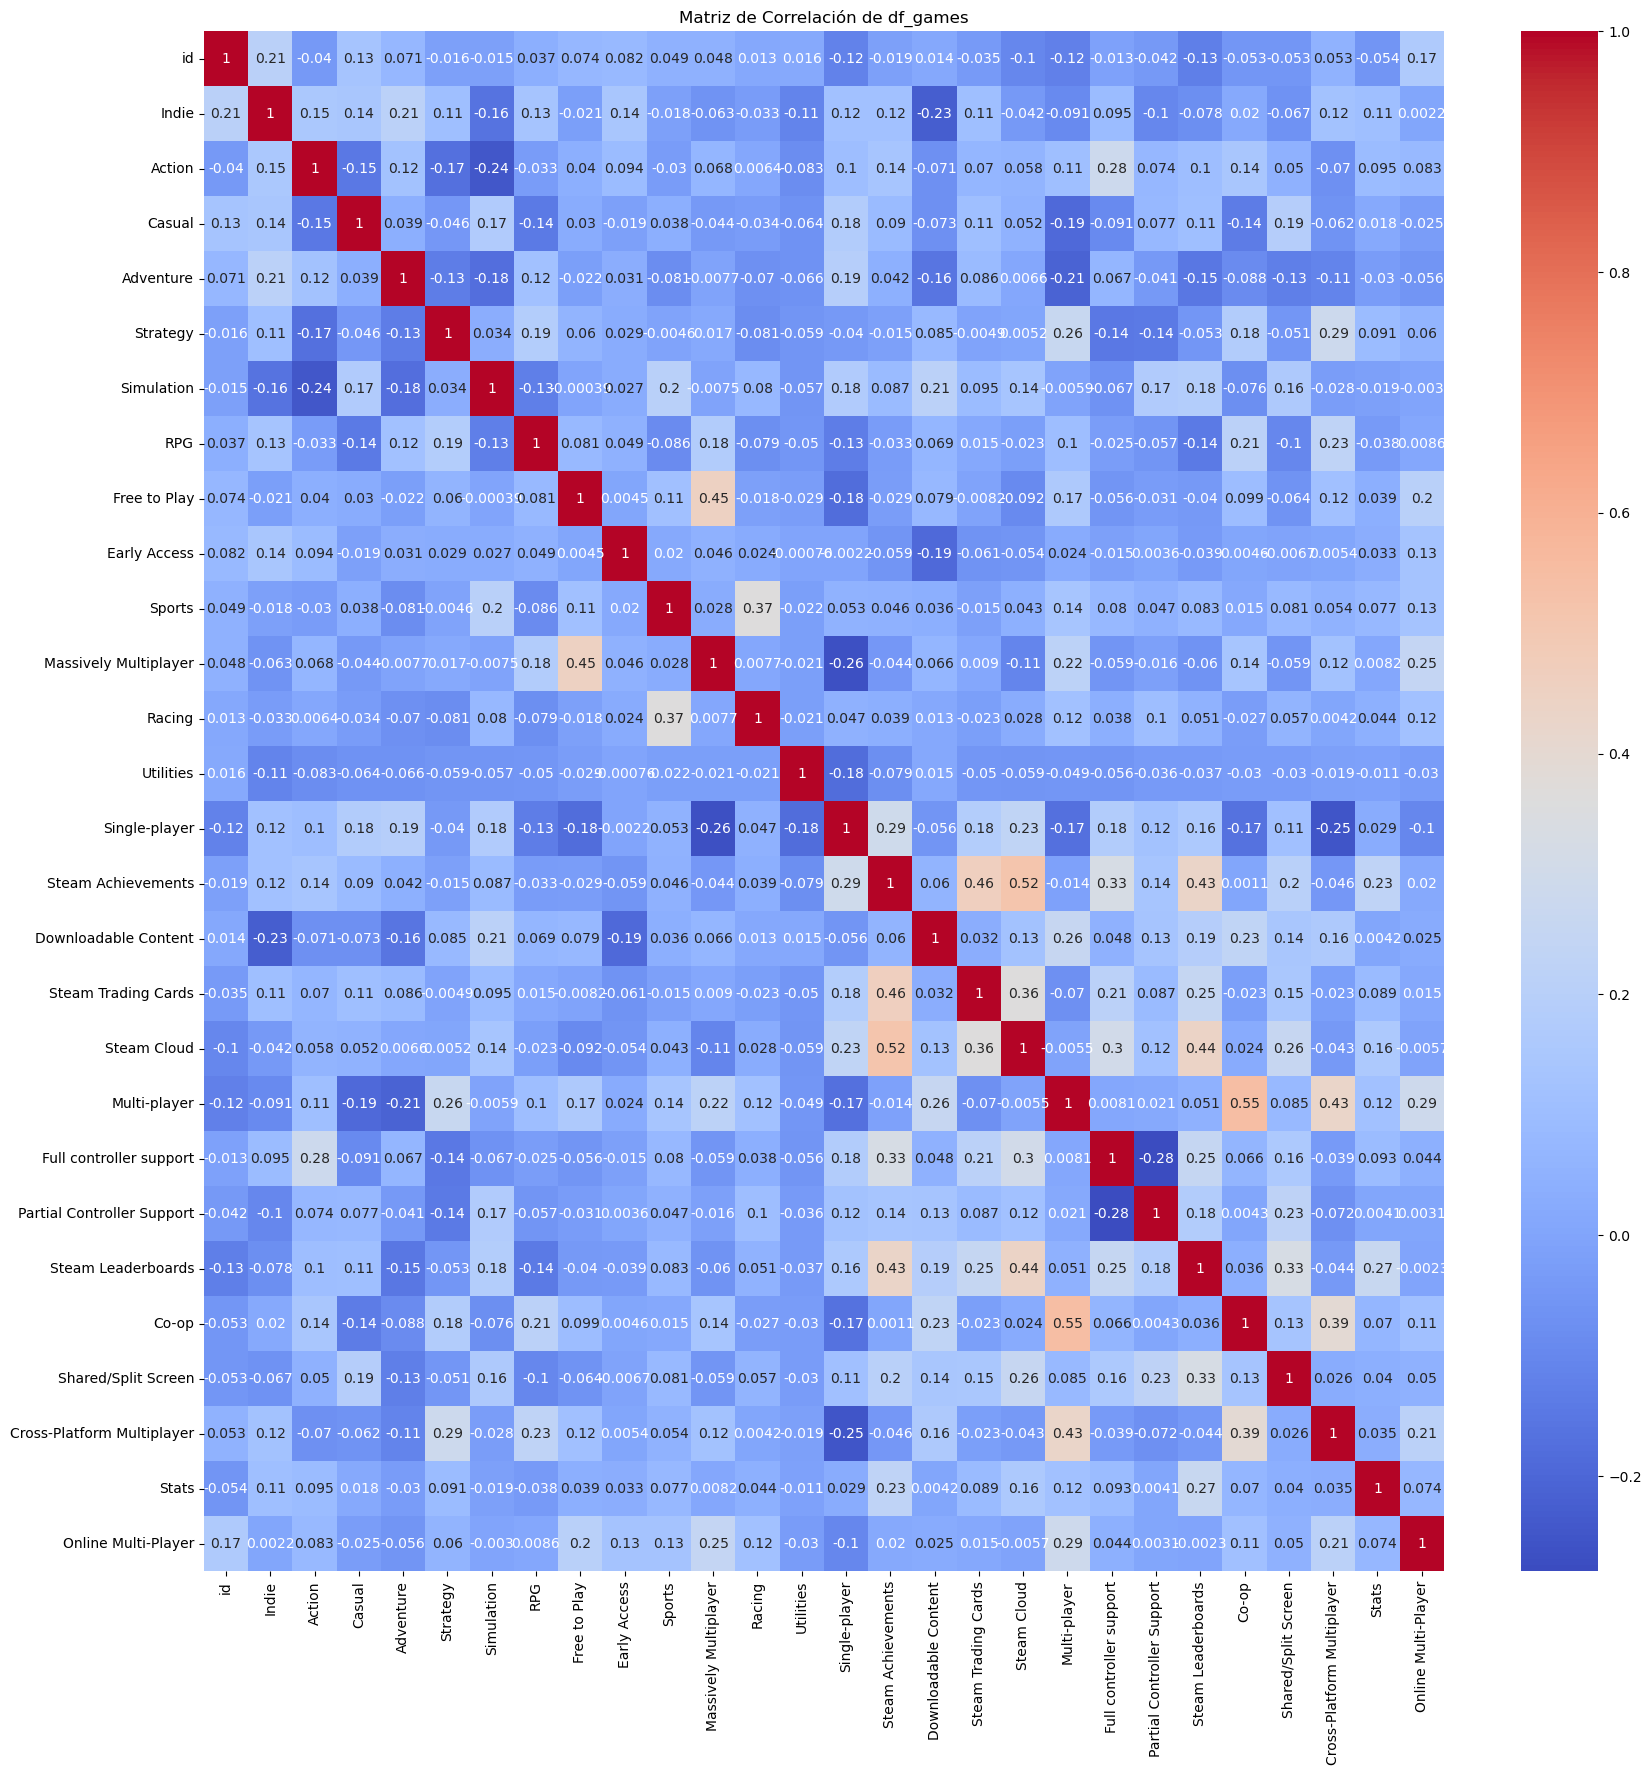

In [5]:
# Calcula la matriz de correlación para df_items
correlation_matrix = df_merged_gen_specs.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de df_games')
plt.show()

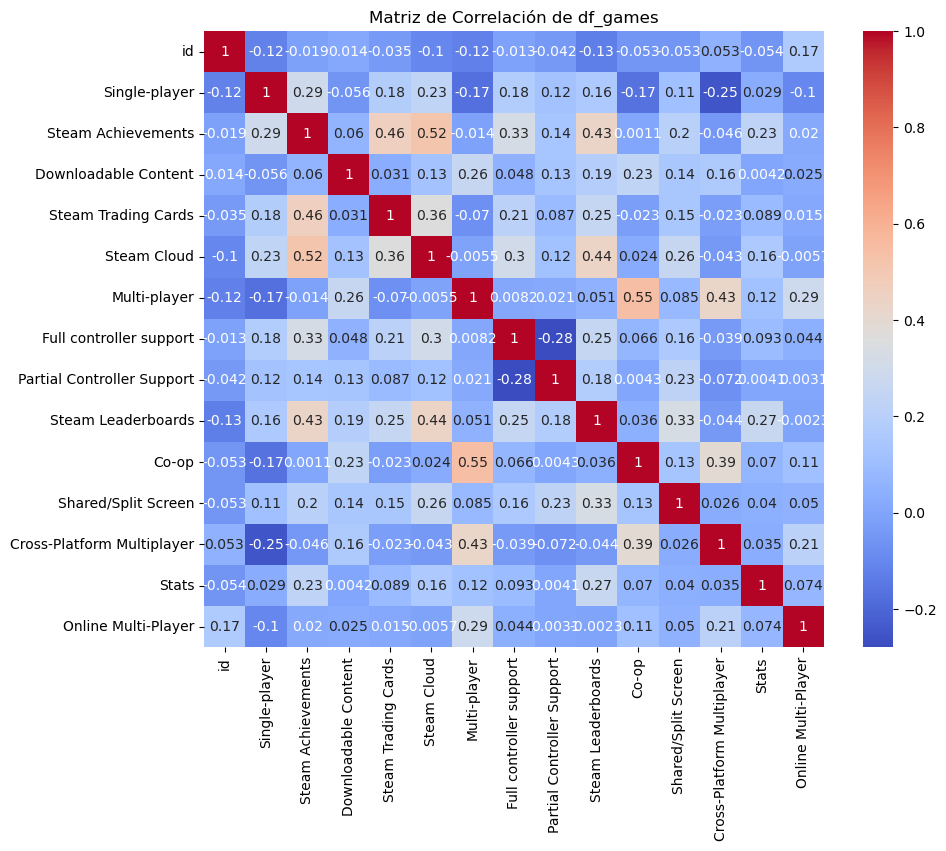

In [33]:
# Calcula la matriz de correlación para df_items
correlation_matrix = df_specs.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de df_games')
plt.show()
